# Masse-Feder-Dämpfer

In [42]:
# Imports
from typing import List
from control.matlab import damp
import control
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

In [43]:
# Variables
m: int = 10
c: int = 2
d: int = 1

numerator: List[int] = [1]
denominator: List[int] = [m,d,c]

In [44]:
# Transfer Function
s = signal.TransferFunction(numerator,denominator)

In [45]:
# Signal step + bode
t, y = signal.step(s)
w, mag, phase = signal.bode(s)

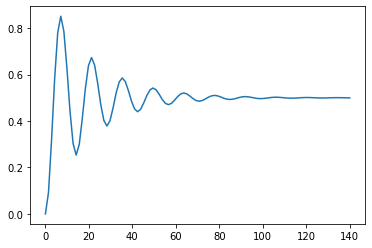

In [46]:
plt.plot(t, y)

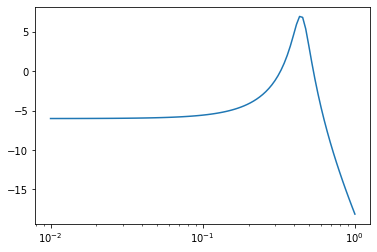

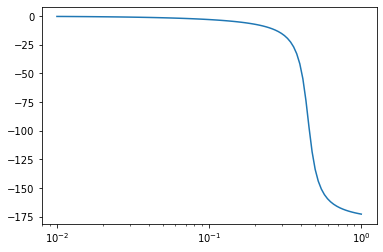

In [47]:
# Bode Plots
plt.figure()
# Bode magnitude plot
plt.semilogx(w, mag)
plt.figure()
# Bode Phase plot
plt.semilogx(w, phase)
plt.show()

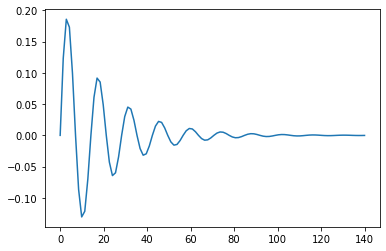

In [48]:
# Impuls plot
t, y = signal.impulse(s)
plt.figure()
plt.plot(t,y)

### Mit Matrizen

In [49]:
# Variablen
mat_A: np.matrix = np.matrix([[0,1],[-c/m,-d/m]])
mat_B: np.array = np.array([[0,1/m]]).T
mat_C: np.array = np.array([1,0])
w_s_d: int = 0

In [50]:
# state-space form
sys = signal.StateSpace(mat_A, mat_B, mat_C, w_s_d)
# transfer-function
tf_m = signal.TransferFunction(sys)

# Signal step + bode
t_m, y_m = signal.step(s)
w_m, mag_m, phase_m = signal.bode(s)

/opt/conda/lib/python3.8/site-packages/scipy/signal/filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


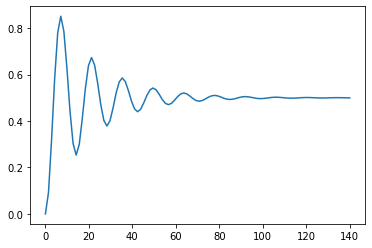

In [51]:
plt.plot(t_m, y_m)

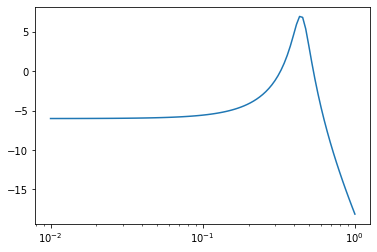

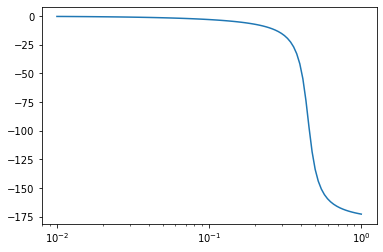

In [52]:
# Bode Plots
plt.figure()
# Bode magnitude plot
plt.semilogx(w_m, mag_m)
plt.figure()
# Bode Phase plot
plt.semilogx(w_m, phase_m)
plt.show()

# Wegerregter Schwinger

In [53]:
# Variablen
m_w_s: int = 10
c_w_s: int = 1
d_w_s: int = 10

step: float = 0.1
t: np.array = np.arange(0, 40, step) + step

omega = 4.47e-01
u = 5 + np.zeros(t.size)

# selbe dimension wie t
np.insert(u, 1, 5)

numerator_w_s: np.array = np.array([d_w_s, c_w_s])
denominator_w_s: np.array = np.array([m_w_s, d_w_s, c_w_s])


In [63]:
weg_sys = signal.TransferFunction(numerator_w_s, denominator_w_s)
tout, yout, xout = signal.lsim(weg_sys, U=u, T=t)

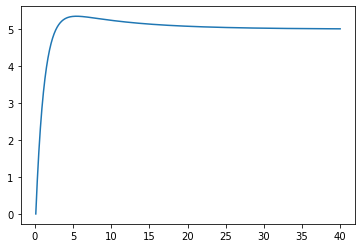

In [64]:
plt.plot(tout,yout)

In [65]:
w, H = signal.freqresp(weg_sys)

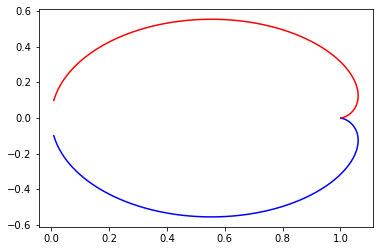

In [66]:
plt.figure()
plt.plot(H.real, H.imag, "b")
plt.plot(H.real, -H.imag, "r")
plt.show()

In [69]:
weg_sys2 = control.TransferFunction(numerator_w_s,denominator_w_s)
wn, damp, poles = weg_sys2.damp()

In [74]:
# Natural Frequencies of the poles
wn

array([0.88729833, 0.11270167])

In [75]:
# Damping values
damp

array([1., 1.])

In [77]:
# poles
poles

array([-0.88729833, -0.11270167])